<a href="https://colab.research.google.com/github/NicoloAvesani/Mining_Project/blob/main/MINING_PROJECT_APRIORI_ECLAT_FPGROWTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENTS TO DO:
- CHANGING THE NUMBER OF ITEMS IN THE DATASET TO SEE HOW THE RUNTIME OF ALGORITHMS IS AFFECTED


#Dataset generator

In this section, I used the Jeff Heaton's Dataset generator (https://github.com/jeffheaton/papers/blob/master/2016/ieee-freq-item/GenerateFreqData.py).

The datasets are generated by giving as input the following values:


1.   Number of Rows in the dataset (total number of transactions)
2.   Maximum number of Items per basket (random, but with the max as upper limit)
3.   Number of frequent items (number of single frequent items in the dataset)
4.   Number of unique items (cardinality of our universe of items U)
5.   Density (probability to find frequent items/itemsets in the transaction)






In [3]:
# This Python script was used to collect the data for following paper/conference:
#
# Heaton, J. (2016, April). Comparing Dataset Characteristics that Favor the Apriori,
# Eclat or FP-Growth Frequent Itemset Mining Algorithms. In SoutheastCon 2015 (pp. 1-6). IEEE.
#
# http://www.jeffheaton.com
#

# Generate benchmark data for frequent itemset mining.
__author__ = 'jheaton'
import random
import csv
from tqdm import tqdm

def sizeof_fmt(num):
    for x in ['','k','m','g']:
        if num < 1000.0:
            return "%3.1f%s" % (num, x)
        num /= 1000.0
    return "%3.1f%s" % (num, 't')

def generate_itemset(row_count, max_per_basket, num_freq_sets, item_count, prob_frequent):
    '''
    Generate a dataset of frequent items. These paramaters can be changed to
    determine the type of data to generate.

    :param int row_count: The number of rows in the dataset.
    :param int max_per_basket: Maximum number of items per basket.
    :param int num_freq_sets: The number of unique frequent item sets.
    :param int item_count: The number of unique items.
    :param float prob_frequent: The probability of a basket containing a frequent itemset.
    '''
    # Generate the data
    pop_frequent = ["F"+str(n) for n in range(0,max_per_basket)]
    pop_regular = ["I"+str(n) for n in range(max_per_basket,item_count)]
    freq_itemsets = []

    # Create a filename that encodes the max_per_basket and basket_count into
    # the filename.
    filename = str(prob_frequent)+"_tsz" \
        + str(max_per_basket)+'_tct' \
         +sizeof_fmt(row_count)+'.txt'

    for i in tqdm(range(num_freq_sets),desc=f"{filename}:pass 1/2"):
        cnt = random.randint(1,max_per_basket)
        freq_itemsets.append(random.sample(pop_frequent,cnt))

    with open(filename, 'w') as f:
        for i in tqdm(range(row_count),desc=f"{filename}:pass 2/2"):
            line = []

            cnt = random.randint(1,max_per_basket)
            if random.random()<=prob_frequent:
                idx = random.randint(0,len(freq_itemsets)-1)
                for j in range(len(freq_itemsets[idx])):
                    line.append(freq_itemsets[idx][j])

            needed = max(0,cnt - len(line))
            line = line + random.sample(pop_regular,needed)

            f.write(" ".join(line)+"\n")

random.seed(1000)
ROWS = 10000

for i in range(10,100,10):
    generate_itemset(ROWS, i, 100, 5000, 0.5)

for i in range(1,9,1):
    generate_itemset(ROWS, 50, 100, 5000, i/10.0)

0.8_tsz50_tct10.0k.txt:pass 2/2: 100%|██████████| 10000/10000 [00:00<00:00, 69621.59it/s]


In [ ]:
    #Generate a dataset of frequent items. These paramaters can be changed to
    #determine the type of data to generate.

    #:param int row_count: The number of rows in the dataset. (in this case they are 10000)
    #:param int max_per_basket: Maximum number of items per basket. (max 100 items per basket)
    #:param int num_freq_sets: The number of unique frequent item sets. (100 freq item sets)
    #:param int item_count: The number of unique items. (500 unique items)
    #:param float prob_frequent: The probability of a basket containing a frequent itemset. (50% is the probability that a basket contains a freq itemset)

# ANALYSIS OF THE GENERATED DATASETS

In [5]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('0.5_tsz20_tct10.0k.txt')

In [6]:
# I want the dataset to be a np.array
dataset_array = np.array(dataset)

In [7]:
dataset_array[:16]

array([['I3843 I3226 I3366 I3188 I2097 I3877 I1189 I3376 I2907 I4655 I3425 I3118 I266'],
       ['F18 F2 F7 F6 F17 I1258 I3528 I4615 I882 I2469 I1520 I1002'],
       ['F17 F3 F18 F11 F5 F7 F8 F1 F4 F12 F6 F2 F19 F9 F16 F10 F0 F14'],
       ['F1 F17 F0 F4 F6'],
       ['I3694 I3740 I1729'],
       ['I3878 I3334 I3811 I3547 I2326'],
       ['I4245 I1129 I1162'],
       ['F5 F10 F11 F1'],
       ['F11 F4 F0 F2 F6 F16 F15 F3 F17'],
       ['F7 F13 F11 F15 F3 F16 I4971 I3560'],
       ['F6 F7 F8 F16 F1 F2 F14 F18 F5 F15 F0 F9 F19 F13 F17'],
       ['I388 I888 I1478 I3851 I3790 I4367 I1451 I158 I3646 I3793 I169 I4572'],
       ['F8 F17 F16 F0 F19 F1 F4 F3 F12 F15 F9 F5 F2 F13 F7 F14 F10 F6'],
       ['I3795 I3011 I4642 I1262 I4462 I3924'],
       ['F14 F13 F1 F3 F10 F11 F18 F6 F4 F9 F5 F2 F8 F12 F16'],
       ['I4260 I1300 I1059 I1636 I2709 I105 I157 I4950 I3591']],
      dtype=object)

In [8]:
print(dataset_array[3])

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
new_array = []
for i in range(len(dataset_array)):
    split_elements = np.char.split(dataset_array[i].astype(str))
    ok_split_elements = (split_elements[0])
    new_array.append(ok_split_elements)

['F1 F17 F0 F4 F6']


In [9]:
#now it works
new_array[3]

['F1', 'F17', 'F0', 'F4', 'F6']

In [10]:
# I can see that all the transation sizes are less or equal to the maximum size = 20 in this case
for i in range(21):
  print('lenght new_array',i,'=',len(new_array[i]))

lenght new_array 0 = 13
lenght new_array 1 = 12
lenght new_array 2 = 18
lenght new_array 3 = 5
lenght new_array 4 = 3
lenght new_array 5 = 5
lenght new_array 6 = 3
lenght new_array 7 = 4
lenght new_array 8 = 9
lenght new_array 9 = 8
lenght new_array 10 = 15
lenght new_array 11 = 12
lenght new_array 12 = 18
lenght new_array 13 = 6
lenght new_array 14 = 15
lenght new_array 15 = 9
lenght new_array 16 = 6
lenght new_array 17 = 4
lenght new_array 18 = 5
lenght new_array 19 = 4
lenght new_array 20 = 12


In [4]:
size_dataset_10k = [
    '0.5_tsz10_tct10.0k.txt',
    '0.5_tsz20_tct10.0k.txt',
    '0.5_tsz30_tct10.0k.txt',
    '0.5_tsz40_tct10.0k.txt',
    '0.5_tsz50_tct10.0k.txt',
    '0.5_tsz60_tct10.0k.txt',
    '0.5_tsz70_tct10.0k.txt',
    '0.5_tsz80_tct10.0k.txt',
    '0.5_tsz90_tct10.0k.txt',
]

In [5]:
size_dataset_100k = [
    '0.5_tsz10_tct100.0k.txt',
    '0.5_tsz20_tct100.0k.txt',
    '0.5_tsz30_tct100.0k.txt',
    '0.5_tsz40_tct100.0k.txt',
    '0.5_tsz50_tct100.0k.txt',
    '0.5_tsz60_tct100.0k.txt',
    '0.5_tsz70_tct100.0k.txt',
    '0.5_tsz80_tct100.0k.txt',
    '0.5_tsz90_tct100.0k.txt',
]

In [6]:
size_dataset_1m = [
    '0.5_tsz10_tct1.0m.txt',
    '0.5_tsz20_tct1.0m.txt',
    '0.5_tsz30_tct1.0m.txt',
    '0.5_tsz40_tct1.0m.txt',
    '0.5_tsz50_tct1.0m.txt',
    '0.5_tsz60_tct1.0m.txt',
    '0.5_tsz70_tct1.0m.txt',
    '0.5_tsz80_tct1.0m.txt',
    '0.5_tsz90_tct1.0m.txt',
]

In [7]:
density_dataset_10k =[
    '0.1_tsz50_tct10.0k.txt',
    '0.2_tsz50_tct10.0k.txt',
    '0.3_tsz50_tct10.0k.txt',
    '0.4_tsz50_tct10.0k.txt',
    '0.5_tsz50_tct10.0k.txt',
    '0.6_tsz50_tct10.0k.txt',
    '0.7_tsz50_tct10.0k.txt',

]

In [8]:
density_dataset_100k =[
    '0.1_tsz50_tct100.0k.txt',
    '0.2_tsz50_tct100.0k.txt',
    '0.3_tsz50_tct100.0k.txt',
    '0.4_tsz50_tct100.0k.txt',
    '0.5_tsz50_tct100.0k.txt',
    '0.6_tsz50_tct100.0k.txt',
    '0.7_tsz50_tct100.0k.txt',

]

In [9]:
density_dataset_1m = [
    '0.1_tsz50_tct1.0m.txt',
    '0.2_tsz50_tct1.0m.txt',
    '0.3_tsz50_tct1.0m.txt',
    '0.4_tsz50_tct1.0m.txt',
    '0.5_tsz50_tct1.0m.txt',
    '0.6_tsz50_tct1.0m.txt',
    '0.7_tsz50_tct1.0m.txt',

]

# APRIORI
In this section, it's possible to see how the apriori algorithm works and the results that it produces.

For the analysis has been used the library apyrori.

In [11]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=ab49eca86f8dddbaf422f1197cbd254a6439ee4bbf6e1fea87c1f8da09d2bd4f
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [11]:
from apyori import apriori
import time

# Example dataset
dataset = new_array

# Minimum support threshold
min_support = 0.15

start = time.time()
# Apply the Apriori algorithm
results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
for itemset in results:
    items = list(itemset.items)
    support = itemset.support
    print(items, support)

end = time.time()

print('Time required:', end - start)


['F0'] 0.26612661266126614
['F1'] 0.2968296829682968
['F10'] 0.23812381238123811
['F11'] 0.24562456245624562
['F12'] 0.25962596259625964
['F13'] 0.25412541254125415
['F14'] 0.2806280628062806
['F15'] 0.24262426242624263
['F16'] 0.27872787278727873
['F17'] 0.2923292329232923
['F18'] 0.2881288128812881
['F19'] 0.23352335233523352
['F2'] 0.2696269626962696
['F3'] 0.2854285428542854
['F4'] 0.29142914291429145
['F5'] 0.29182918291829185
['F6'] 0.2684268426842684
['F7'] 0.2676267626762676
['F8'] 0.27442744274427444
['F9'] 0.2448244824482448
['F1', 'F0'] 0.18671867186718671
['F0', 'F10'] 0.15761576157615761
['F0', 'F11'] 0.1626162616261626
['F0', 'F12'] 0.1791179117911791
['F0', 'F13'] 0.1707170717071707
['F0', 'F14'] 0.1843184318431843
['F0', 'F15'] 0.16631663166316632
['F16', 'F0'] 0.1856185618561856
['F0', 'F17'] 0.18951895189518952
['F0', 'F18'] 0.1779177917791779
['F0', 'F19'] 0.1706170617061706
['F0', 'F3'] 0.1852185218521852
['F4', 'F0'] 0.2012201220122012
['F0', 'F5'] 0.21772177217721

# APRIORI DENSITY

In this section, I have done the experiments on the runtime of the Apriori changing the density datasets.

The order is the following:



1.   Density Experiment on datasets with 10.000 transactions
2.   Density Experiments on datasets with 100.000 transactions
3.   Density Experiments on datasets with 1.000.000 transactions



In [12]:
!pip install apyori

In [12]:
from apyori import apriori
import pandas as pd
import time
import numpy as np

# APRIORI DENSITY 10K


In [39]:
#apriori density

runtime_apriori_density_10k = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]

for i in range(len(density_dataset_10k)):
  dataset = pd.read_csv(density_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  min_support = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array



  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_density_10k.append(result_time)

In [40]:
runtime_apriori_density_10k

[0.46175670623779297,
 0.20361328125,
 0.25176477432250977,
 0.30988121032714844,
 0.5921335220336914,
 0.8849263191223145,
 0.6448376178741455]

In [16]:
import matplotlib.pyplot as plt

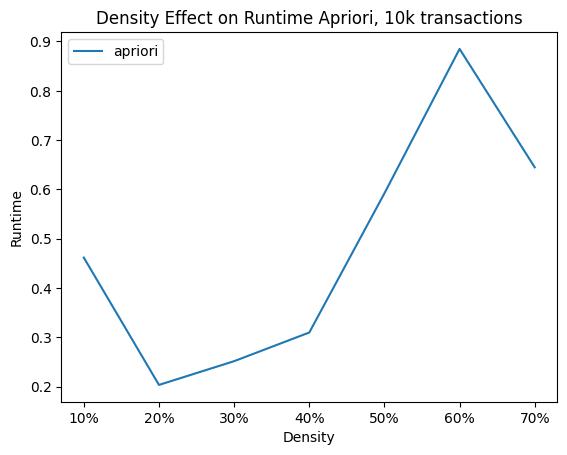

In [41]:
#plt apriori density
plt.title('Density Effect on Runtime Apriori, 10k transactions')
plt.plot(runtime_apriori_density_10k, label='apriori')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

#APRIORI DENSITY 100K

In [32]:
#apriori density 100K

runtime_apriori_density_100k = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]

for i in range(len(density_dataset_100k)):
  dataset = pd.read_csv(density_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  min_support = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array



  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_density_100k.append(result_time)

In [33]:
runtime_apriori_density_100k

[2.639732599258423,
 2.6310198307037354,
 10.728707790374756,
 4.390350580215454,
 4.504456043243408,
 4.822855234146118,
 35.535968542099]

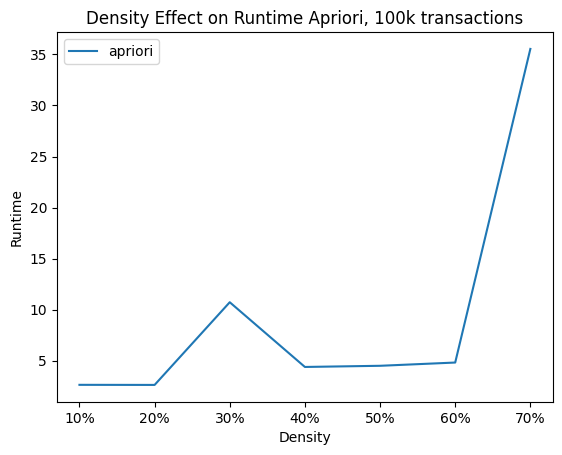

In [35]:
plt.title('Density Effect on Runtime Apriori, 100k transactions')
plt.plot(runtime_apriori_density_100k, label='apriori')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# APRIORI DENSITY 1M

In [45]:
#apriori density 1M

runtime_apriori_density_1m = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]

for i in range(len(density_dataset_1m)):
  dataset = pd.read_csv(density_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  min_support = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array



  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_density_1m.append(result_time)

In [48]:
runtime_apriori_density_1m

[24.799319982528687,
 31.011881828308105,
 30.486406087875366,
 30.6640944480896,
 41.73510026931763,
 38.24025297164917,
 207.3942506313324]

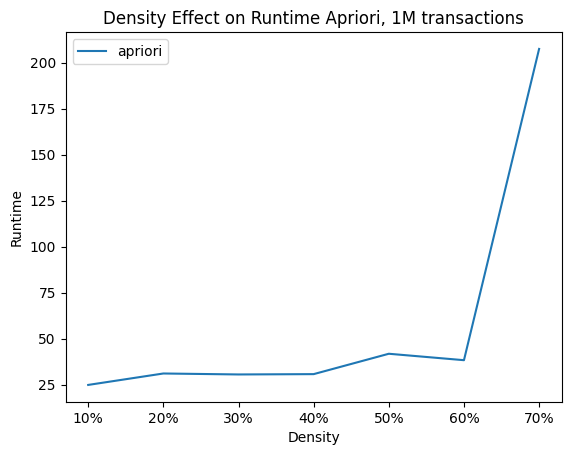

In [49]:
plt.title('Density Effect on Runtime Apriori, 1M transactions')
plt.plot(runtime_apriori_density_1m, label='apriori')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# APRIORI SIZE

In this section, I have done the experiments on the runtime of the Apriori changing the size od the datasets.

The order is the following:



1.   Size Experiment on datasets with 10.000 transactions
2.   Size Experiments on datasets with 100.000 transactions
3.   Size Experiments on datasets with 1.000.000 transactions

#APRIORI SIZE 10K

In [21]:
#apriori size
runtime_apriori_size_10k = []


for i in range(len(size_dataset_10k)):
  dataset = pd.read_csv(size_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)


# Example dataset
  dataset = new_array

# Minimum support
  min_support=0.2

  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_size_10k.append(result_time)


In [27]:
runtime_apriori_size_10k

[0.058129310607910156,
 0.12930512428283691,
 0.2019646167755127,
 0.26523566246032715,
 0.40932154655456543,
 0.46475768089294434,
 0.6514971256256104,
 0.8062577247619629,
 1.0948509809485]

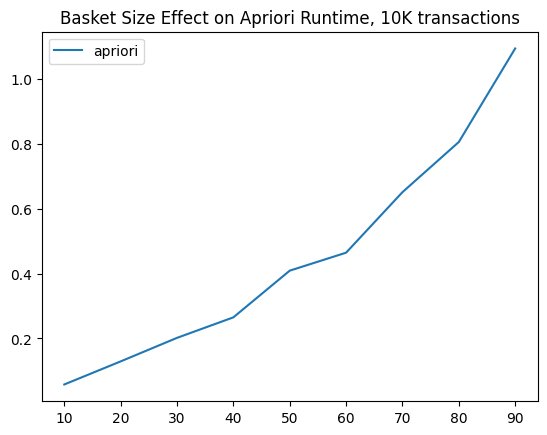

In [28]:
#plt apriori size
plt.title('Basket Size Effect on Apriori Runtime, 10K transactions')
plt.plot(runtime_apriori_size_10k, label='apriori')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# APRIORI SIZE 100K

In [31]:
#apriori size 100K
runtime_apriori_size_100k = []


for i in range(len(size_dataset_100k)):
  dataset = pd.read_csv(size_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)


# Example dataset
  dataset = new_array

# Minimum support
  min_support=0.2

  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_size_100k.append(result_time)


In [35]:
runtime_apriori_size_100k

[0.7098245620727539,
 1.2071585655212402,
 2.459894875982,
 4.34791898727417,
 5.663951635360718,
 15.579792261123657,
 11.678595781326294,
 14.172457695007324,
 11.230562448501587]

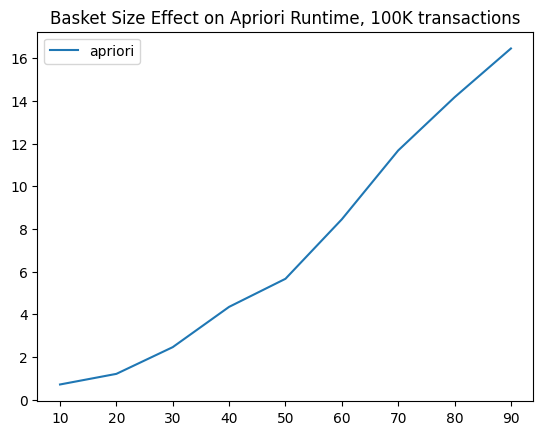

In [40]:
plt.title('Basket Size Effect on Apriori Runtime, 100K transactions')
plt.plot(runtime_apriori_size_100k, label='apriori')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# APRIORI SIZE 1M

In [41]:
#apriori size 1M
runtime_apriori_size_1m = []


for i in range(len(size_dataset_1m)):
  dataset = pd.read_csv(size_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)


# Example dataset
  dataset = new_array

# Minimum support
  min_support=0.2

  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_size_1m.append(result_time)

In [46]:
runtime_apriori_size_1m

[6.335336923599243,
 15.749750137329102,
 22.904958094854344,
 32.694584131240845,
 47.75974082946777,
 61.803590059280396,
 75.93533611297607,
 107.65677857398987,
 155.0858051776886]

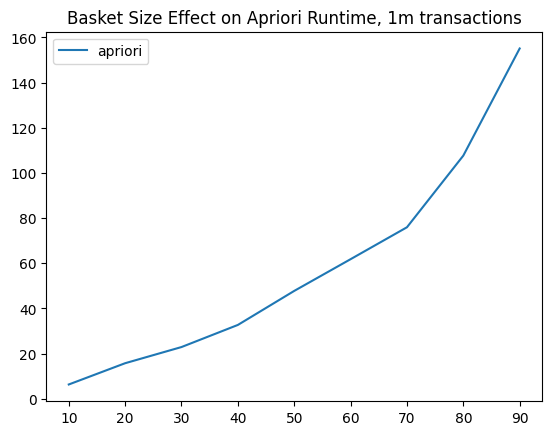

In [47]:
plt.title('Basket Size Effect on Apriori Runtime, 1m transactions')
plt.plot(runtime_apriori_size_1m, label='apriori')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# FP-GROWTH ALGORITHM

#FP-GROWTH

In this section, it's possible to see how the FP-Growth algorithm works and the results that it produces.

The FP-Growth function has been taken from the following website:
https://github.com/JackHCC/Apriori-and-FP_Growth/blob/master/FP_growth.py

In order to have an idea of how the FP-Growth algorithm works and to perform the Experiments, it's possible to run the below cells.


In [44]:
#fp-growth

# fp-growth

from collections import defaultdict, namedtuple
import time

def find_frequent_itemsets(transactions, minimum_support, include_support=False):
    # Function to find frequent itemsets in the transactions dataset

    items = defaultdict(lambda: 0)

    for transaction in transactions:
        for item in transaction:
            items[item] += 1

    # Filtering frequent 1-itemsets
    items = dict((item, support) for item, support in items.items()
        if support >= minimum_support)

    def clean_transaction(transaction):
        transaction = filter(lambda v: v in items, transaction)
        transaction_list = list(transaction)
        transaction_list.sort(key=lambda v: items[v], reverse=True)
        return transaction_list

    # Constructing the FP-tree
    master = FPTree()
    for transaction in map(clean_transaction, transactions):
        master.add(transaction)

    def find_with_suffix(tree, suffix):
        for item, nodes in tree.items():
            support = sum(n.count for n in nodes)
            if support >= minimum_support and item not in suffix:
                found_set = [item] + suffix
                yield (found_set, support) if include_support else found_set

                cond_tree = conditional_tree_from_paths(tree.prefix_paths(item))
                for s in find_with_suffix(cond_tree, found_set):
                    yield s

    for itemset in find_with_suffix(master, []):
        yield itemset

class FPTree(object):
    # FP-tree data structure

    Route = namedtuple('Route', 'head tail')

    def __init__(self):
        # Initialize the root node and routes
        self._root = FPNode(self, None, None)
        self._routes = {}

    @property
    def root(self):
        # Create the root node
        return self._root

    def add(self, transaction):
        # Add a transaction to the tree
        point = self._root

        for item in transaction:
            next_point = point.search(item)
            if next_point:
                # Current node already exists
                next_point.increment()
            else:
                # Create a new node
                next_point = FPNode(self, item)
                point.add(next_point)

                # Update the routes
                self._update_route(next_point)

            point = next_point

    def _update_route(self, point):
        assert self is point.tree

        try:
            route = self._routes[point.item]
            route[1].neighbor = point  # route[1] is the tail
            self._routes[point.item] = self.Route(route[0], point)
        except KeyError:
            # Start a new node
            self._routes[point.item] = self.Route(point, point)

    def items(self):
        # Iterate over the items in the tree
        for item in self._routes.keys():
            yield (item, self.nodes(item))

    def nodes(self, item):
        # Iterate over the nodes associated with an item
        try:
            node = self._routes[item][0]
        except KeyError:
            return

        while node:
            yield node
            node = node.neighbor

    def prefix_paths(self, item):
        # Generate prefix paths for an item
        def collect_path(node):
            path = []
            while node and not node.root:
                path.append(node)
                node = node.parent
            path.reverse()
            return path

        return (collect_path(node) for node in self.nodes(item))

    def inspect(self):
        # Print the tree structure
        self.root.inspect(1)

        for item, nodes in self.items():
            for node in nodes:
                print('    %r' % node)

def conditional_tree_from_paths(paths):
    # Construct a conditional tree from paths
    tree = FPTree()
    condition_item = None
    items = set()

    for path in paths:
        if condition_item is None:
            condition_item = path[-1].item

        point = tree.root
        for node in path:
            next_point = point.search(node.item)
            if not next_point:
                # Add a new node to the tree
                items.add(node.item)
                count = node.count if node.item == condition_item else 0
                next_point = FPNode(tree, node.item, count)
                point.add(next_point)
                tree._update_route(next_point)
            point = next_point

    assert condition_item is not None

    # Calculate the counts for nodes
    for path in tree.prefix_paths(condition_item):
        count = path[-1].count
        for node in reversed(path[:-1]):
            node._count += count

    return tree

class FPNode(object):
    # FP-tree node

    def __init__(self, tree, item, count=1):
        self._tree = tree
        self._item = item
        self._count = count
        self._parent = None
        self._children = {}
        self._neighbor = None

    def add(self, child):
        # Add a child node

        if not isinstance(child, FPNode):
            raise TypeError("Can only add other FPNodes as children")

        if not child.item in self._children:
            self._children[child.item] = child
            child.parent = self

    def search(self, item):
        # Search for a child node with the given item
        try:
            return self._children[item]
        except KeyError:
            return None

    def __contains__(self, item):
        return item in self._children

    @property
    def tree(self):
        return self._tree

    @property
    def item(self):
        return self._item

    @property
    def count(self):
        return self._count

    def increment(self):
        if self._count is None:
            raise ValueError("Root nodes have no associated count.")
        self._count += 1

    @property
    def root(self):
        return self._item is None and self._count is None

    @property
    def leaf(self):
        return len(self._children) == 0

    @property
    def parent(self):
        return self._parent

    @parent.setter
    def parent(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a parent.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a parent from another tree.")
        self._parent = value

    @property
    def neighbor(self):
        return self._neighbor

    @neighbor.setter
    def neighbor(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a neighbor.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a neighbor from another tree.")
        self._neighbor = value

    @property
    def children(self):
        return tuple(self._children.values())

    def inspect(self, depth=0):
        for child in self.children:
            child.inspect(depth + 1)

    def __repr__(self):
        if self.root:
            return "<%s (root)>" % type(self).__name__
        return "<%s %r (%r)>" % (type(self).__name__, self.item, self.count)


In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    start = time.time()

    total_baskets = len(dataset)
    min_support = 0.15 * total_baskets

    frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

    result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))

    result = sorted(result, key=lambda i: i[0])
    for itemset, support in result:
        print(str(itemset) + ' ' + str(support/total_baskets))

    end = time.time()
    print('Execution time:', str(end - start))

# FP-TREE

In this section, I used a new library that I learn ('anytree'), and a function to generate grapghically the FP-Tree.

In this way it's possible to analyze in an immiediate way the relationships presents between items and how the paths are generated.

In [ ]:
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from anytree import Node, RenderTree

# Define the itemsets and their support values
itemsets = result

# Create the root node
root = Node("Root")

# Create the tree nodes and add them to the tree
for itemset, support in itemsets:
    current_node = root
    for item in itemset:
        child_node = None
        for child in current_node.children:
            if child.name == item:
                child_node = child
                break
        if child_node is None:
            child_node = Node(item, parent=current_node)
        current_node = child_node

# Print the tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


Root
├── F0
├── F1
│   ├── F0
│   └── F76
├── F10
├── F11
├── F12
│   └── F24
├── F13
├── F14
├── F15
├── F16
├── F17
├── F18
│   ├── F0
│   ├── F1
│   ├── F10
│   ├── F12
│   ├── F24
│   ├── F27
│   ├── F3
│   ├── F33
│   ├── F34
│   ├── F56
│   ├── F59
│   ├── F62
│   ├── F65
│   └── F71
├── F19
├── F2
│   ├── F0
│   ├── F1
│   ├── F18
│   ├── F20
│   ├── F22
│   ├── F24
│   ├── F25
│   ├── F3
│   ├── F34
│   ├── F35
│   ├── F47
│   ├── F63
│   └── F78
├── F20
│   ├── F24
│   └── F3
├── F21
├── F22
│   ├── F1
│   ├── F12
│   ├── F18
│   ├── F33
│   ├── F44
│   ├── F48
│   ├── F62
│   ├── F65
│   ├── F76
│   └── F84
├── F23
├── F24
├── F25
│   └── F33
├── F26
├── F27
├── F28
├── F29
├── F3
│   ├── F25
│   └── F63
├── F31
├── F32
├── F33
├── F34
│   └── F0
├── F35
├── F36
├── F37
├── F38
│   ├── F10
│   ├── F12
│   ├── F16
│   ├── F18
│   ├── F2
│   ├── F22
│   ├── F24
│   ├── F44
│   ├── F47
│   ├── F58
│   ├── F68
│   ├── F72
│   ├── F78
│   └── F86
├── F39
├── F4
├── F40
├── F41
├──

# FP-GROWTH DENSITY

In this section, I have done the experiments on the runtime of the FP-Growth changing the density datasets.

The order is the following:



1.   Density Experiment on datasets with 10.000 transactions
2.   Density Experiments on datasets with 100.000 transactions
3.   Density Experiments on datasets with 1.000.000 transactions

#FP-GROWTH DENSITY 10K

In [ ]:
#fp-growth density 10k
runtime_fpgrowth_density_10k = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_10k)):
  dataset = pd.read_csv(density_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  total_baskets = len(dataset)
  min_support = min_supporto[i] * total_baskets

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()




      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_density_10k.append(result_time)



In [60]:
runtime_fpgrowth_density_10k

[0.350983409854,
 0.46915650367736816,
 0.532677412033081,
 0.4927101135253906,
 0.5358970165252686,
 0.6726245880126953,
 0.5954139232635498]

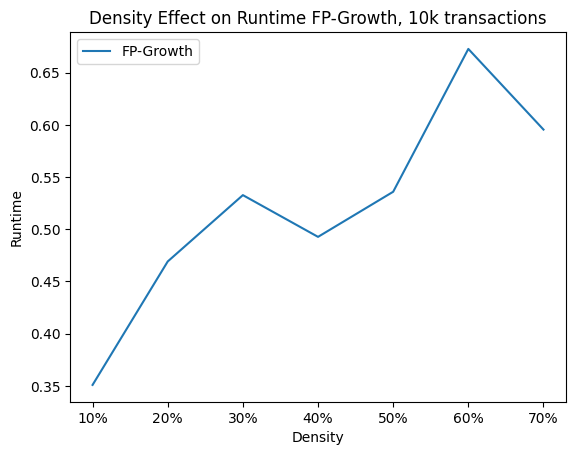

In [62]:
#plt fp-growth density
plt.title('Density Effect on Runtime FP-Growth, 10k transactions')
plt.plot(runtime_fpgrowth_density_10k, label='FP-Growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# FP-GROWTH DENSITY 100K

In [ ]:
#fp-growth density 100k
runtime_fpgrowth_density_100k = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_100k)):
  dataset = pd.read_csv(density_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  total_baskets = len(dataset)
  min_support = min_supporto[i] * total_baskets

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()




      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_density_100k.append(result_time)

In [67]:
runtime_fpgrowth_density_100k

[2.6180899143218994,
 1.7186553478240967,
 2.77412748336792,
 3.950047731399536,
 2.3219165802001953,
 2.1750264167785645,
 5.018407344818115]

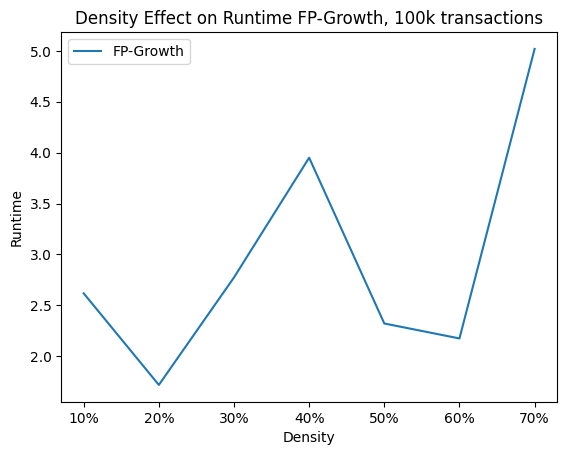

In [68]:
plt.title('Density Effect on Runtime FP-Growth, 100k transactions')
plt.plot(runtime_fpgrowth_density_100k, label='FP-Growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

#FP-GROWTH DENSITY 1M

In [ ]:
#fp-growth density 1M
runtime_fpgrowth_density_1m = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_1m)):
  dataset = pd.read_csv(density_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  total_baskets = len(dataset)
  min_support = min_supporto[i] * total_baskets

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()




      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_density_1m.append(result_time)

In [70]:
runtime_fpgrowth_density_1m

[14.727741003036499,
 14.496958017349243,
 15.768231868743896,
 17.00074577331543,
 19.484079837799072,
 21.409701824188232,
 26.269965648651123]

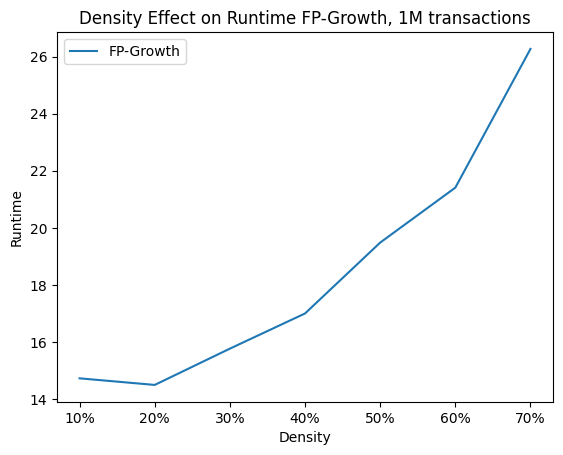

In [71]:
plt.title('Density Effect on Runtime FP-Growth, 1M transactions')
plt.plot(runtime_fpgrowth_density_1m, label='FP-Growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# FP-GROWTH SIZE

In this section, I have done the experiments on the runtime of the FP-Growth changing the size od the datasets.

The order is the following:



1.   Size Experiment on datasets with 10.000 transactions
2.   Size Experiments on datasets with 100.000 transactions
3.   Size Experiments on datasets with 1.000.000 transactions

# FP-GROWTH SIZE 10K

In [ ]:
#fp-growth size 1OK
runtime_fpgrowth_size_10k= []

for i in range(len(size_dataset_10k)):
  dataset = pd.read_csv(size_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_size_10k.append(result_time)

In [79]:
runtime_fpgrowth_size_10k

[0.05118298530578613,
 0.15473478298723,
 0.17227816581726074,
 0.2681007385253906,
 0.36771607398986816,
 0.9461593627929688,
 1.0671207904815674,
 1.0731627941131592,
 1.15473478298723]

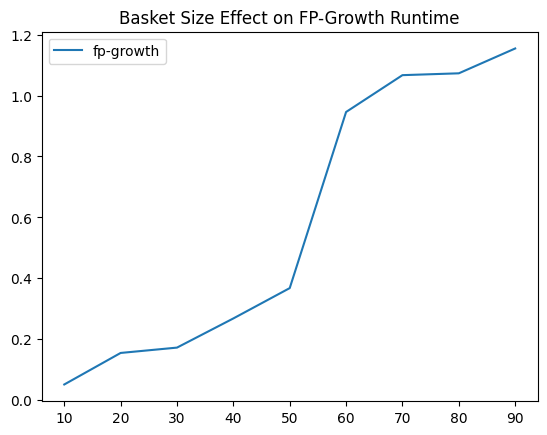

In [78]:
#plt fp-growth SIZE
plt.title('Basket Size Effect on FP-Growth Runtime 10K transactions')
plt.plot(runtime_fpgrowth_size_10k, label='fp-growth')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# FP-GROWTH SIZE 100K

In [ ]:
#fp-growth size 100K
runtime_fpgrowth_size_100k= []

for i in range(len(size_dataset_100k)):
  dataset = pd.read_csv(size_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_size_100k.append(result_time)

In [88]:
runtime_fpgrowth_size_100k

[0.47838616371154785,
 0.8126873970031738,
 1.39823948928374,
 2.19098029830982,
 2.0854082107543945,
 2.9991536140441895,
 4.125277280807495,
 7.532905340194702,
 8.547709465026855]

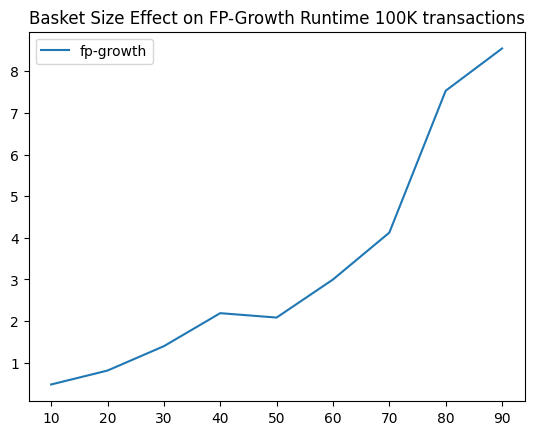

In [89]:
plt.title('Basket Size Effect on FP-Growth Runtime 100K transactions')
plt.plot(runtime_fpgrowth_size_100k, label='fp-growth')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# FP-GROWTH SIZE 1M

In [ ]:
#fp-growth size 10m
runtime_fpgrowth_size_1m= []

for i in range(len(size_dataset_1m)):
  dataset = pd.read_csv(size_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_size_1m.append(result_time)

In [91]:
runtime_fpgrowth_size_1m

[8.253273725509644,
 14.557640075683594,
 12.531421899795532,
 15.740024089813232,
 20.63192915916443,
 25.473475456237793,
 31.46007466316223,
 38.01119947433472,
 49.04589629173279]

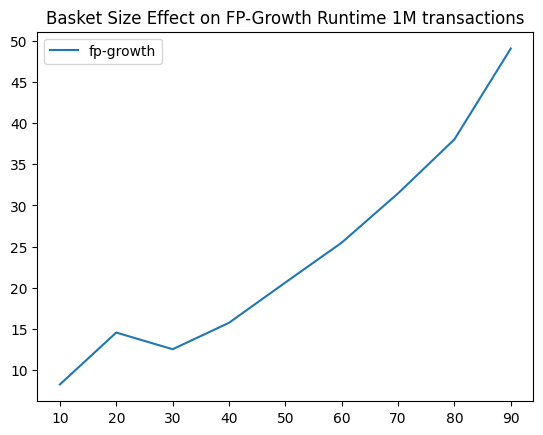

In [92]:
plt.title('Basket Size Effect on FP-Growth Runtime 1M transactions')
plt.plot(runtime_fpgrowth_size_1m, label='fp-growth')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# ECLAT ALGORITHM

# ECLAT

In this section, it's possible to see how the ECLAT (Equivalence CLAss Transformation) algorithm works and the results that it produces.

The ECLAT algorithm function has been taken from the following website:
https://github.com/jagdeep227/Frequent_itemset_mining/blob/main/Eclat_g.py

In order to have an idea of how the ECLAT algorithm works and to perform the Experiments, it's possible to run the below cells.



In [93]:
# eclat
#eclat
import time

FreqItems = dict()
support = dict()


def eclat(prefix, items, dict_id ,minsup,cnt):

    while items:
        i ,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup*cnt:
            print(prefix + [i], isupp/len(dataset))
            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                jtids = itids & ojtids
                if len(jtids ) >= minsup*cnt:
                    suffix.append((j, jtids))
            dict_id += 1
            eclat(prefix +[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id ,minsup,cnt)

In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets

    start = time.time()
    items = {}

    for transaction_id, transaction in enumerate(dataset):
        for item in transaction:
            if item in items:
                items[item].add(transaction_id)
            else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
    items = [(item, itids) for item, itids in items.items()]


    cnt = len(dataset)
    minsup = 0.15
    # Function call to start ECLAT algorithm
    eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

    '''result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))'''

    '''result'''

    end = time.time()
    print('Execution time:', str(end - start))

# ECLAT DENSITY

In this section, I have done the experiments on the runtime of the ECLAT algorithm changing the density datasets.

The order is the following:



1.   Density Experiment on datasets with 10.000 transactions
2.   Density Experiments on datasets with 100.000 transactions
3.   Density Experiments on datasets with 1.000.000 transactions

# ECLAT DENSITY 10K

In [ ]:
#eclat density 10K

runtime_eclat_density_10K = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_10k)):
  dataset = pd.read_csv(density_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)


  minsup = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]

      start = time.time()
      cnt = len(dataset)

    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_density_10K.append(result_time)



In [105]:
runtime_eclat_density_10K

[0.08984759879834,
 0.13257050514221191,
 0.18460369110107422,
 0.19792699813842773,
 0.2611837387084961,
 0.546135425567627,
 0.39295148849487305]

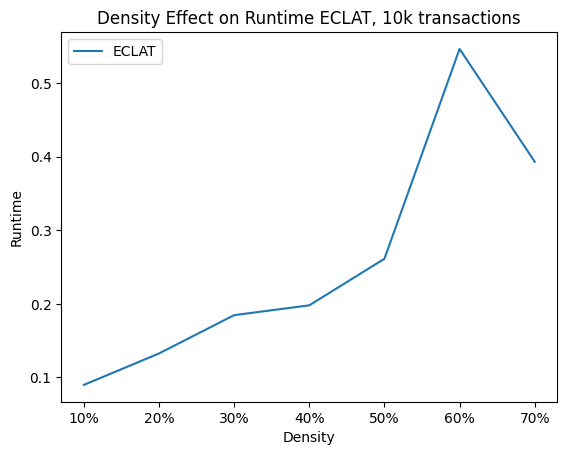

In [106]:
#plt eclat density 10k
plt.title('Density Effect on Runtime ECLAT, 10k transactions')
plt.plot(runtime_eclat_density_10K, label='ECLAT')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# ECLAT DENSITY 100K

In [ ]:
#eclat density 100K

runtime_eclat_density_100K = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_100k)):
  dataset = pd.read_csv(density_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)


  minsup = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]

      start = time.time()
      cnt = len(dataset)

    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_density_100K.append(result_time)

In [115]:
runtime_eclat_density_100K

[1.1684327125549316,
 1.3654122352600098,
 2.009804980985,
 2.7803847789764404,
 2.6189401149749756,
 2.125410318374634,
 4.89875968798734]

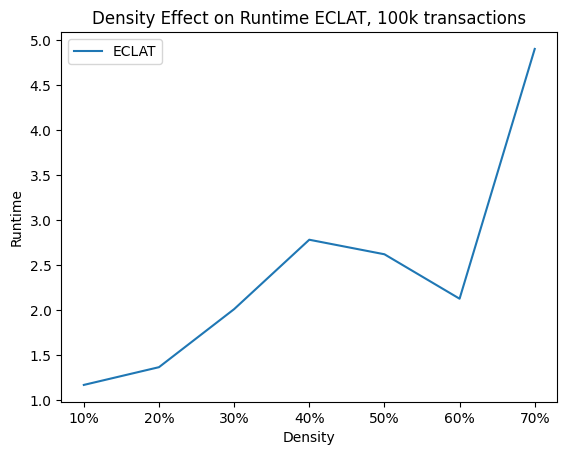

In [116]:
#plt eclat density 100k
plt.title('Density Effect on Runtime ECLAT, 100k transactions')
plt.plot(runtime_eclat_density_100K, label='ECLAT')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# ECLAT DENSITY 1M

In [122]:
#eclat density 1M

runtime_eclat_density_1m = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset_1m)):
  dataset = pd.read_csv(density_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)


  minsup = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]

      start = time.time()
      cnt = len(dataset)

    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_density_1m.append(result_time)

['F1'] 0.040523040523040524
['F32'] 0.04227504227504227
['F44'] 0.042328042328042326
['F16'] 0.04335004335004335
['F8'] 0.04345804345804346
['F49'] 0.04418404418404418
['F28'] 0.0443990443990444
['F27'] 0.04453004453004453
['F4'] 0.04463704463704464
['F36'] 0.04531904531904532
['F6'] 0.04537704537704538
['F40'] 0.04628704628704629
['F13'] 0.046497046497046494
['F10'] 0.04653904653904654
['F35'] 0.04661004661004661
['F5'] 0.04738704738704739
['F21'] 0.04745604745604746
['F15'] 0.04756004756004756
['F42'] 0.04832904832904833
['F29'] 0.048343048343048346
['F9'] 0.04862104862104862
['F19'] 0.04934904934904935
['F33'] 0.049367049367049366
['F2'] 0.04939404939404939
['F2', 'F22'] 0.04139004139004139
['F47'] 0.04942204942204942
['F17'] 0.04945404945404945
['F45'] 0.04964204964204964
['F12'] 0.05023805023805024
['F0'] 0.05023905023905024
['F14'] 0.05049005049005049
['F39'] 0.050493050493050494
['F37'] 0.050504050504050504
['F20'] 0.050596050596050594
['F11'] 0.051164051164051164
['F23'] 0.0513

In [128]:
runtime_eclat_density_1m

[7.574017763137817,
 18.168336153030396,
 19.82528805732727,
 21.487149477005005,
 33.325695514678955,
 30.59329867362976,
 49.909485098454]

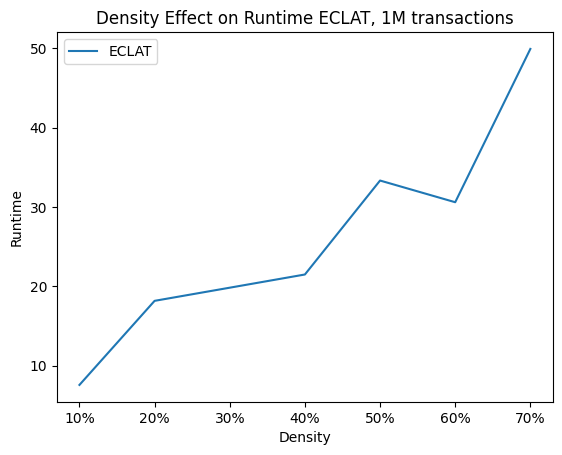

In [129]:
#plt eclat density 1m
plt.title('Density Effect on Runtime ECLAT, 1M transactions')
plt.plot(runtime_eclat_density_1m, label='ECLAT')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# ECLAT SIZE

In this section, I have done the experiments on the runtime of the ECLAT algorithm changing the size od the datasets.

The order is the following:



1.   Size Experiment on datasets with 10.000 transactions
2.   Size Experiments on datasets with 100.000 transactions
3.   Size Experiments on datasets with 1.000.000 transactions

# ECLAT SIZE 10K


In [ ]:
#eclat size 10K

runtime_eclat_size_10k = []

for i in range(len(size_dataset_10k)):
  dataset = pd.read_csv(size_dataset_10k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      start = time.time()
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]


      cnt = len(dataset)
      minsup = 0.2
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_size_10k.append(result_time)



In [134]:
runtime_eclat_size_10k

[0.036160945892333984,
 0.0779118537902832,
 0.1042165756225586,
 0.19661545753479004,
 0.3029670715332031,
 0.35620737075805664,
 0.5125546455383301,
 0.5335030555725098,
 0.700984098594]

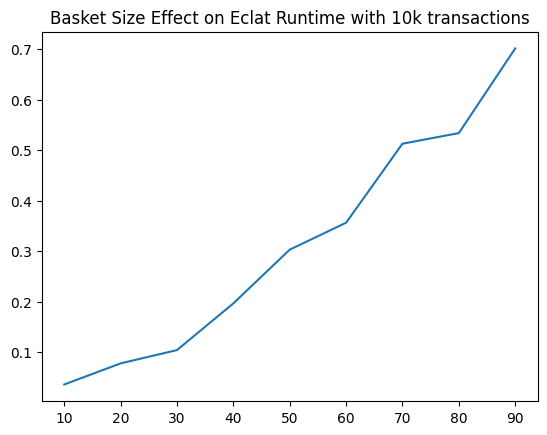

In [135]:
plt.title('Basket Size Effect on Eclat Runtime with 10k transactions')
plt.plot(runtime_eclat_size_10k)
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.show()

# ECLAT SIZE 100K

In [ ]:
#eclat size 100K

runtime_eclat_size_100k = []

for i in range(len(size_dataset_100k)):
  dataset = pd.read_csv(size_dataset_100k[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      start = time.time()
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]


      cnt = len(dataset)
      minsup = 0.2
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_size_100k.append(result_time)


In [137]:
runtime_eclat_size_100k

[0.2309885025024414,
 0.4720444679260254,
 3.0530178546905518,
 1.3419857025146484,
 2.652956962585449,
 4.24304986000061,
 3.666348934173584,
 6.3327226638793945,
 7.94105863571167]

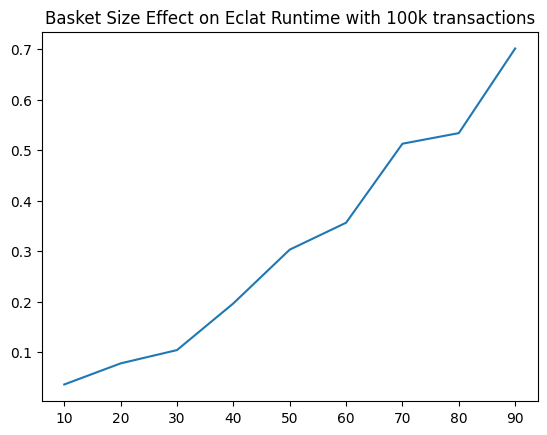

In [138]:
plt.title('Basket Size Effect on Eclat Runtime with 100k transactions')
plt.plot(runtime_eclat_size_10k)
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.show()

# ECLAT SIZE 1M

In [139]:
#eclat size 1M

runtime_eclat_size_1m = []

for i in range(len(size_dataset_1m)):
  dataset = pd.read_csv(size_dataset_1m[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      start = time.time()
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]


      cnt = len(dataset)
      minsup = 0.2
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_size_1m.append(result_time)

['F9'] 0.22512322512322513
['F8'] 0.26494926494926496
['F5'] 0.2749022749022749
['F5', 'F0'] 0.20013520013520014
['F5', 'F6'] 0.20027120027120027
['F5', 'F2'] 0.21012221012221013
['F5', 'F3'] 0.21018821018821018
['F7'] 0.2753082753082753
['F7', 'F3'] 0.2001082001082001
['F7', 'F6'] 0.21033321033321034
['F2'] 0.2899142899142899
['F2', 'F1'] 0.2050942050942051
['F2', 'F0'] 0.21010721010721012
['F2', 'F3'] 0.22006922006922006
['F0'] 0.2902082902082902
['F0', 'F1'] 0.2099062099062099
['F0', 'F3'] 0.2200932200932201
['F0', 'F6'] 0.2203122203122203
['F1'] 0.2952922952922953
['F1', 'F3'] 0.20022420022420023
['F1', 'F6'] 0.20542020542020542
['F4'] 0.3046413046413046
['F4', 'F3'] 0.20504220504220505
['F4', 'F6'] 0.20512120512120513
['F6'] 0.30585530585530585
['F6', 'F3'] 0.2254202254202254
['F3'] 0.31034331034331036
['F1'] 0.21998721998721998
['F17'] 0.22515122515122515
['F4'] 0.2298822298822299
['F13'] 0.2395922395922396
['F9'] 0.24446224446224446
['F7'] 0.24996824996824996
['F5'] 0.2549092549

In [140]:
runtime_eclat_size_1m

[1.5800597667694092,
 6.469405889511108,
 27.26793336868286,
 18.900551319122314,
 35.53742074966431,
 47.64561867713928,
 61.36454224586487,
 82.00947833061218,
 107.83350896835327]

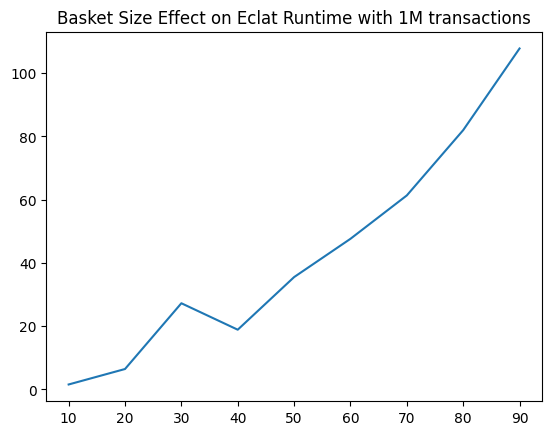

In [141]:
plt.title('Basket Size Effect on Eclat Runtime with 1M transactions')
plt.plot(runtime_eclat_size_1m)
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.show()

# RESULTS

# DENSITY RESULTS WITH DIFFERENT TRANSACTIONS DATABASE LENGTH

# DENSITY EFFECT WITH 10K TRANSACTIONS

# DENSITY EFFECT WITH 100K TRANSACTIONS

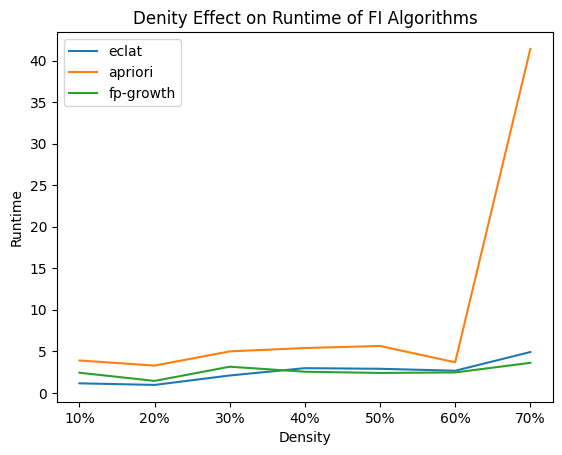

In [ ]:
#density with 100k transactions, 100 frequent items, 5000 as cardinality of universe of items

plt.title('Denity Effect on Runtime of FI Algorithms')
plt.plot(runtime_eclat_density, label='eclat')
plt.plot(runtime_apriori_density, label='apriori')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

**SOME CONSIDERATIONS**

We can see that both the **Eclat** and **FP-Growth** algorithms perform better than the **Apriori**.

**Apriori** Runtime goes to plus infitity when we have a density of 60%, that's because we reach the maximum memory that the RAM can handle, so the runtime increases a lot.

When the density is lower than 40%, **Eclat** is the faster algorithm, but for densities grater than 40% the **FP-Growth** becomes the best algorithm.

**BEST ALGORITHM**

if density < 40% : Eclat

else             : FP-Growth

# DENSITY EFFECT WITH 1MILLION TRANSACTIONS

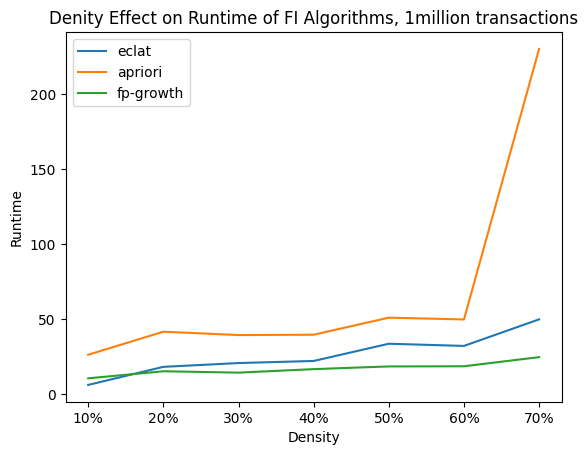

In [ ]:
#density with 1 million transactions
plt.title('Denity Effect on Runtime of FI Algorithms, 1million transactions')
plt.plot(runtime_eclat_density, label='eclat')
plt.plot(runtime_apriori_density, label='apriori')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

**SOME CONSIDERATIONS**

Using a dataset with 1million transactions, we can see that there is actually an higher difference between Eclat and FP-Growth.

In this case, even if when we have a density of 10% the Eclat is the better algorithm, then by increasing the density of frequent itemsets, the FP-Growth is the faster and best algorithm.

Apriori remains the worst and slower algorithm, that's because, by increasing the number of transactions in the dataset, also the time required by the algorithm to read all them increases.

**BEST ALGORITHM**

FP-Growth

# SIZE EFFECT EXPERIMENT RESULTS WITH DIFFERENT TRASACTIONS LENGTH

# SIZE EFFECT WITH 100K TRANSACTIONS

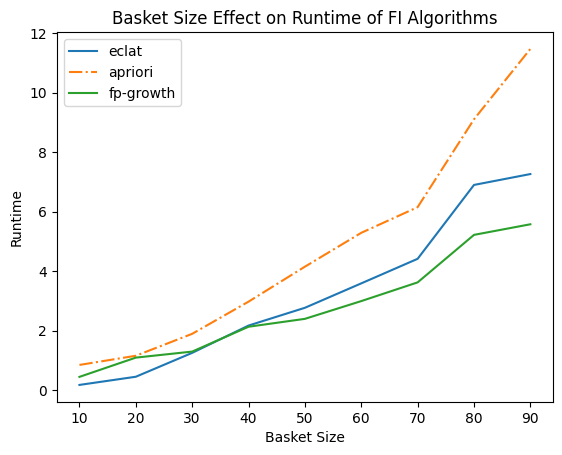

In [ ]:
# size 100k transactions
plt.title('Basket Size Effect on Runtime of FI Algorithms')
plt.plot(runtime_eclat, label='eclat')
plt.plot(runtime_apriori, label='apriori', linestyle='-.')
plt.plot(runtime_fpgrowth, label='fp-growth')
plt.xlabel('Basket Size')
plt.ylabel('Runtime')
density = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()


**SOME CONSIDERATIONS**

Overall, the three algorithms perform similarly, they grow in a linear way.

Also in this experiment the Apriori seems to be the slower algorithm, while Eclat and FP-Growth perform better.

When we have a low basket size, less than 40, the Eclat is the best algorithm, while when we increase the size of the buskets, the FP-Growth is the faster algorithm.

# SIZE EFFECT ON 1 MILLION TRANSACTIONS

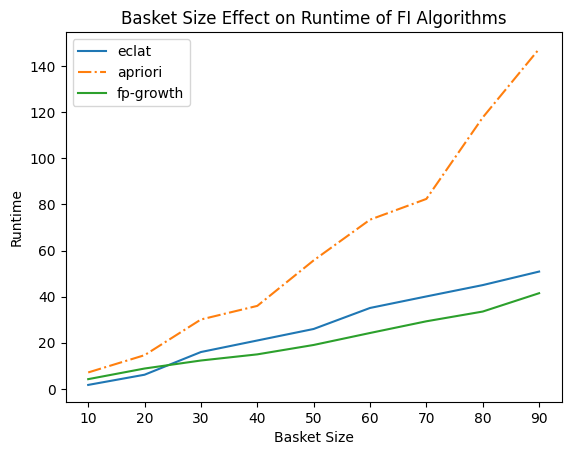

In [ ]:
# size 1 million transactions
plt.title('Basket Size Effect on Runtime of FI Algorithms')
plt.plot(runtime_eclat, label='eclat')
plt.plot(runtime_apriori, label='apriori', linestyle='-.')
plt.plot(runtime_fpgrowth, label='fp-growth')
plt.xlabel('Basket Size')
plt.ylabel('Runtime')
density = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

**SOME CONSIDERATIONS**

Dealing with a Dataset containing 1 million transactions, the results are different from the previous case with 100k transactions.

Also in this case, as before, the Apriori is the slower algorithm, and as before, when we reach a size of 70, the runtime of the algorithm grows faster.

On the other hand, both Eclat and FP-Growth perform similarly, but we can see that they grow in a more linear way than before, when we perform the analysis on the 100k transactions dataset.

**BEST ALGORITHM**

FP-Growth